# Compare SnowMIP forcing files between Krinner et al. (2018) and Menard et al. (2019)

Both forcings are supposed to be the same. Menard et al. (2019) has the advantage to include the evaluation data also.

- Krinner et al. (2018): https://gmd.copernicus.org/articles/11/5027/2018/ (data: https://www.geos.ed.ac.uk/~ressery/ESM-SnowMIP/netcdf.zip)
- Menard et al. (2019) : https://essd.copernicus.org/articles/11/865/2019/ (data: https://doi.org/10.1594/PANGAEA.897575)

In [1]:
# Env: phd_v3
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar

In [2]:
path_krinner = '/home/lalandmi/Dropbox/data/SnowMIP/forcing'
path_menard = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/'

## Check the Col de Porte site

In [3]:
ds_cdp_krinner = xr.open_dataset(path_krinner+'/met_insitu_cdp_1994_2014.nc')
ds_cdp_krinner

<xarray.Dataset>
Dimensions:  (time: 175320)
Coordinates:
  * time     (time) datetime64[ns] 1994-10-01T01:00:00 ... 2014-10-01
Data variables:
    LWdown   (time) float32 ...
    Psurf    (time) float32 ...
    Qair     (time) float32 ...
    Rainf    (time) float32 ...
    Snowf    (time) float32 ...
    SWdown   (time) float32 ...
    Tair     (time) float32 ...
    Wind     (time) float32 ...

In [4]:
ds_cdp_menard = xr.open_dataset(path_menard+'/met_insitu_cdp_1994_2014.nc')
ds_cdp_menard

<xarray.Dataset>
Dimensions:  (time: 175320)
Coordinates:
  * time     (time) datetime64[ns] 1994-10-01T01:00:00 ... 2014-10-01
Data variables:
    LWdown   (time) float32 ...
    Psurf    (time) float32 ...
    Qair     (time) float32 ...
    Rainf    (time) float32 ...
    Snowf    (time) float32 ...
    SWdown   (time) float32 ...
    Tair     (time) float32 ...
    Wind     (time) float32 ...

In [7]:
(ds_cdp_menard - ds_cdp_krinner).LWdown.max()

<xarray.DataArray 'LWdown' ()>
array(0.)

## Check evaluation data

In [16]:
ds_obs = xr.open_dataset(path_menard+'/obs_insitu_cdp_1994_2014.nc')
ds_obs

<xarray.Dataset>
Dimensions:   (sdepth: 3, time: 175320)
Coordinates:
  * time      (time) datetime64[ns] 1994-10-01T01:00:00 ... 2014-10-01
  * sdepth    (sdepth) float32 0.1 0.2 0.5
Data variables:
    albs      (time) float32 ...
    snd_auto  (time) float32 ...
    snd_man   (time) float32 ...
    snw_auto  (time) float32 ...
    snw_man   (time) float32 ...
    ts        (time) float32 ...
    tsl       (time, sdepth) float32 ...

In [65]:
ds_obs.tsl

<xarray.DataArray 'tsl' (time: 175320, sdepth: 3)>
[525960 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1994-10-01T01:00:00 ... 2014-10-01
  * sdepth   (sdepth) float32 0.1 0.2 0.5
Attributes:
    long_name:  soil temperature
    units:      C

Text(0.5, 0.98, 'Col de Porte')

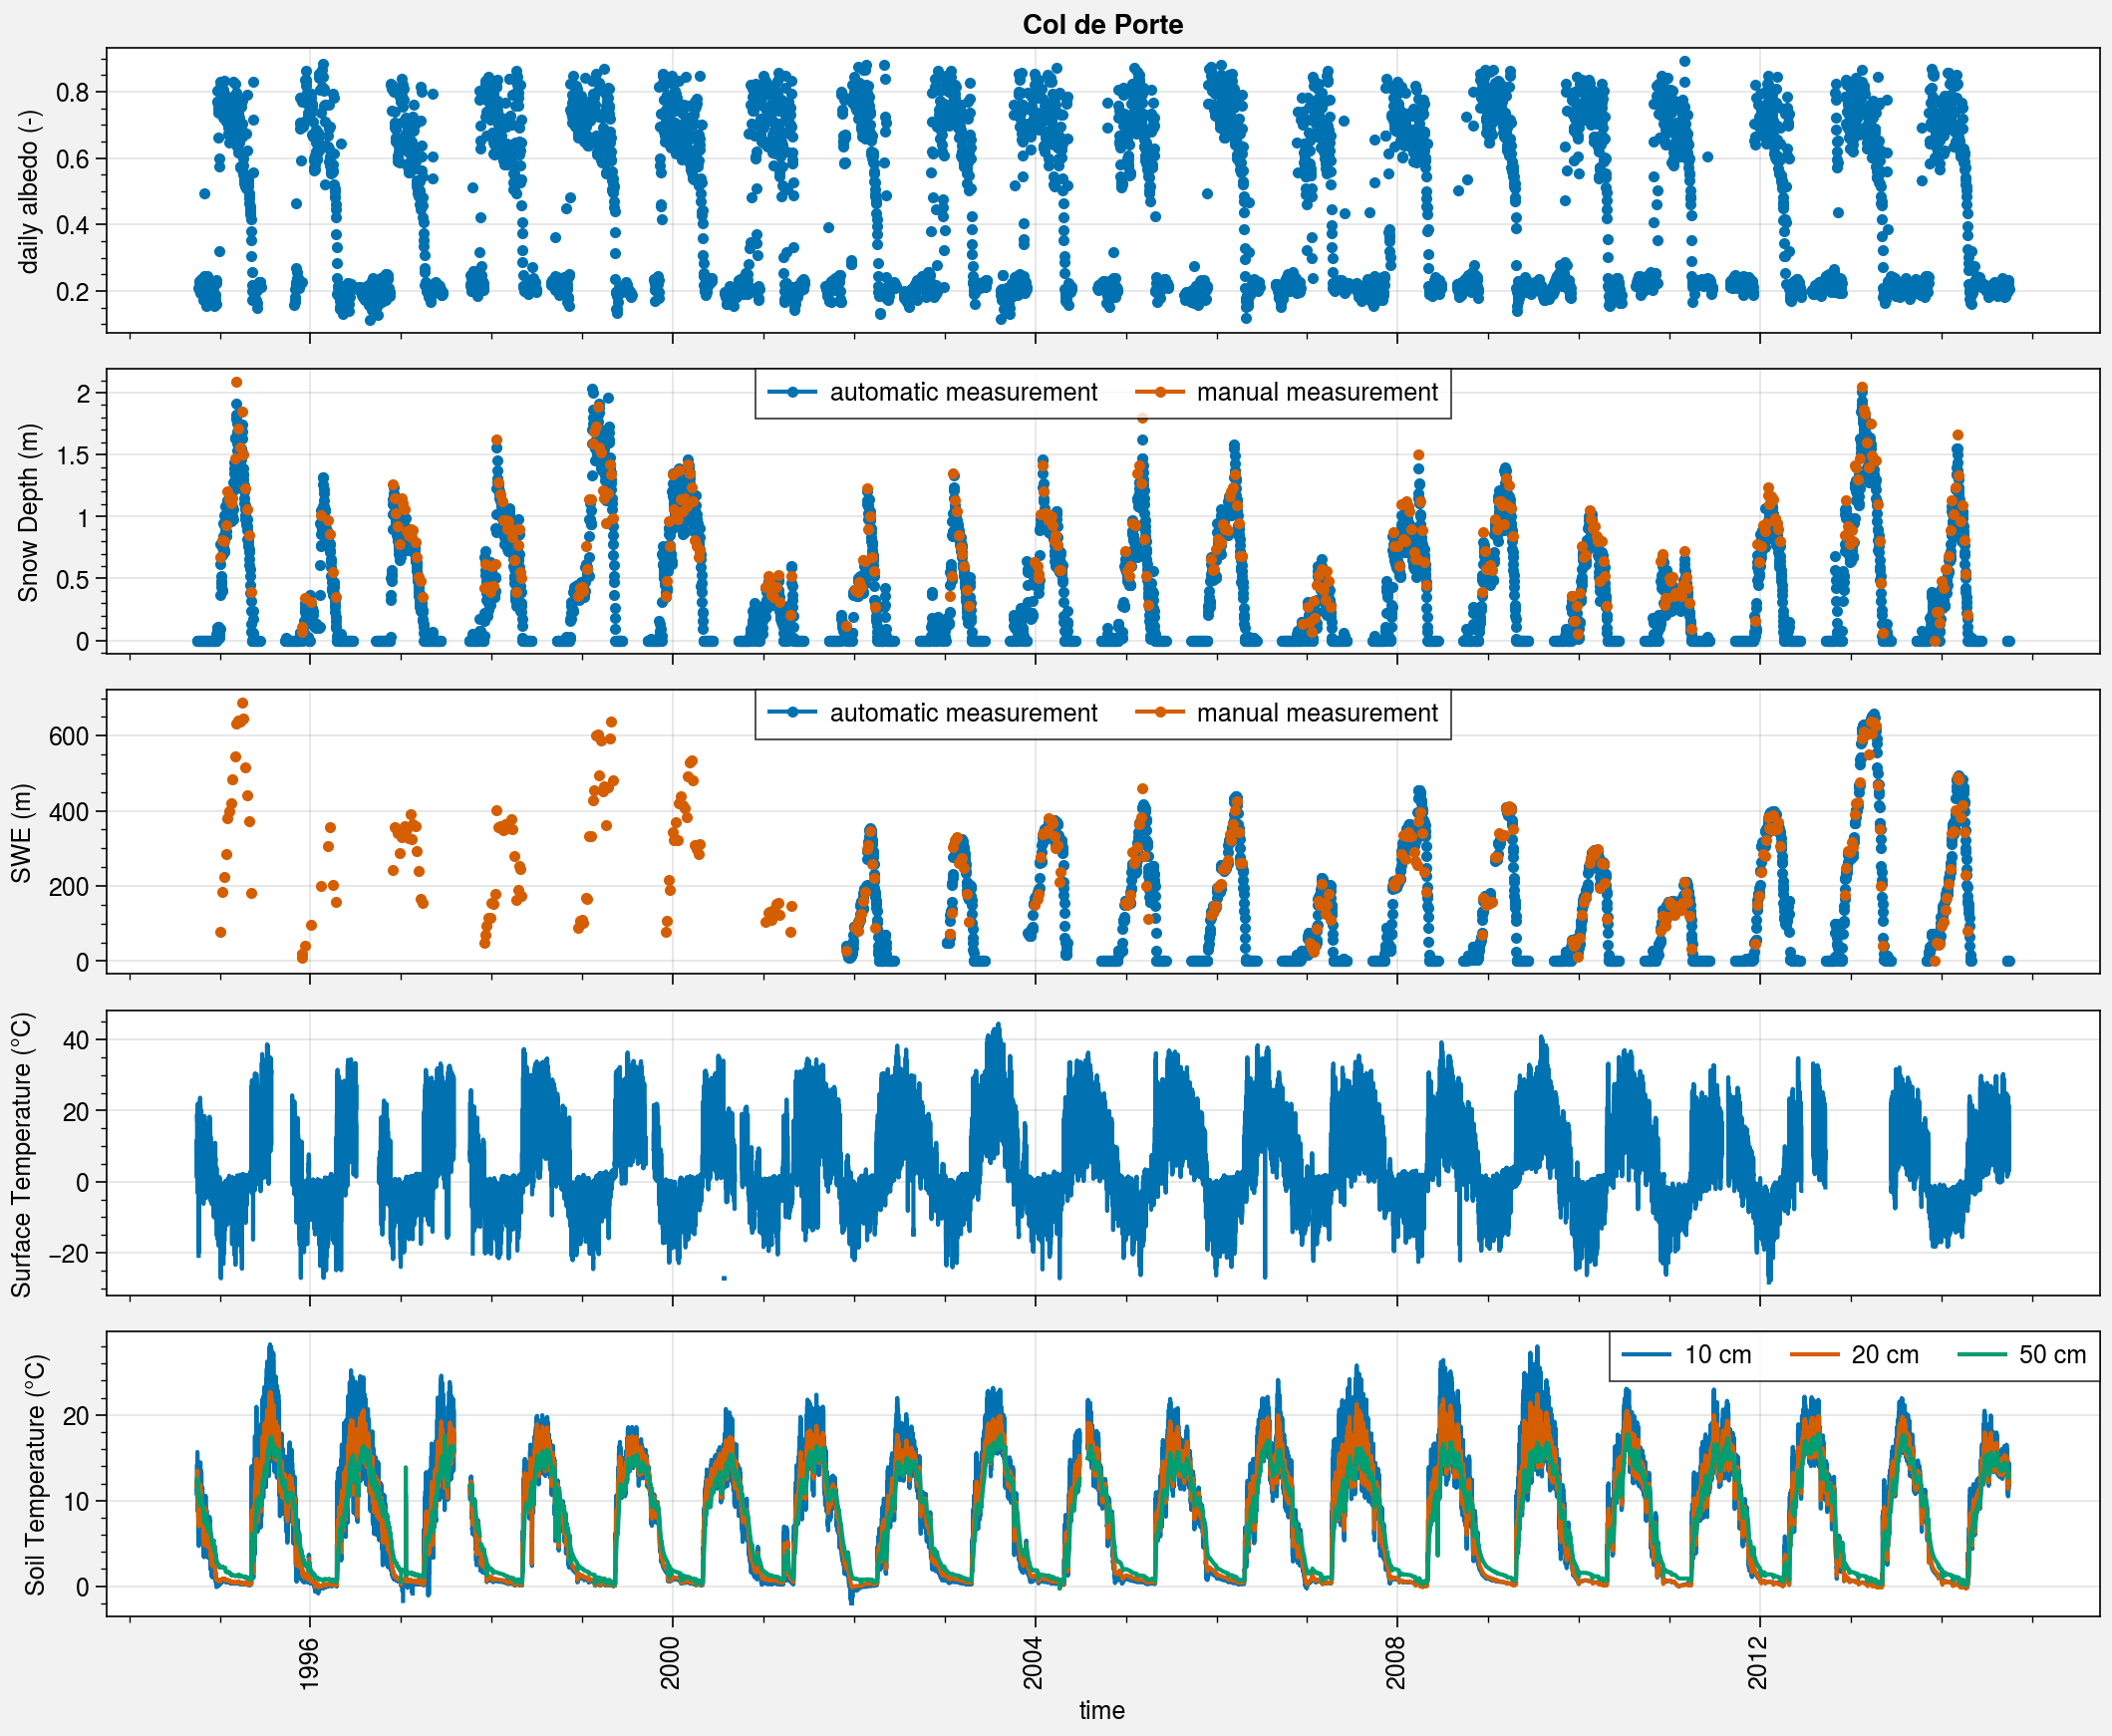

In [71]:
fig, axs = plot.subplots(ncols=1, nrows=5, aspect=7, axwidth=10, sharey=0)

axs[0].plot(ds_obs.albs, marker='.')

axs[1].plot(ds_obs.snd_auto, marker='.', label='automatic measurement')
axs[1].plot(ds_obs.snd_man, marker='.', label='manual measurement')
axs[1].format(ylabel='Snow Depth (m)')
axs[1].legend()

axs[2].plot(ds_obs.snw_auto, marker='.', label='automatic measurement')
axs[2].plot(ds_obs.snw_man, marker='.', label='manual measurement')
axs[2].format(ylabel='SWE (m)')
axs[2].legend()

axs[3].plot(ds_obs.ts)
axs[3].format(ylabel='Surface Temperature (°C)')

axs[4].plot(ds_obs.tsl.isel(sdepth=0), label='10 cm')
axs[4].plot(ds_obs.tsl.isel(sdepth=1), label='20 cm')
axs[4].plot(ds_obs.tsl.isel(sdepth=2), label='50 cm')
axs[4].format(ylabel='Soil Temperature (°C)')
axs[4].legend()

fig.suptitle('Col de Porte')